# Training step example — linear regression (manual optimizer)

In [1]:
import torch

In [2]:
x = torch.linspace(0, 1, 11)

In [3]:
x

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [4]:
x = torch.linspace(0, 1, 11).unsqueeze(1)

In [5]:
x

tensor([[0.0000],
        [0.1000],
        [0.2000],
        [0.3000],
        [0.4000],
        [0.5000],
        [0.6000],
        [0.7000],
        [0.8000],
        [0.9000],
        [1.0000]])

In [6]:
y = 10 * x + 3

In [7]:
y

tensor([[ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.]])

In [8]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [9]:
w, b

(tensor([0.6912], requires_grad=True), tensor([-0.3673], requires_grad=True))

In [10]:
lr = 1e-3

In [11]:
lr

0.001

In [12]:
for epoch in range(200):
  y_pred = (x * w) + b

  loss = ((y - y_pred) ** 2).mean() # MSE

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()


| Step | Code | Explanation |
|------|------|-------------|
| **Forward pass** | `y_pred = x * w + b`<br><br>`loss = ((y - y_pred) ** 2).mean()` | Compute predictions and loss. PyTorch builds a computation graph to track operations on tensors with `requires_grad=True`. |
| **Backward pass** | `loss.backward()` | Computes gradients of `loss` w.r.t all tensors with `requires_grad=True` (e.g., `w.grad`, `b.grad`). Uses reverse-mode automatic differentiation. |
| **Disable gradient tracking** | `with torch.no_grad():`<br><br>`    w -= lr * w.grad`<br><br>`    b -= lr * b.grad` | Prevents PyTorch from tracking the parameter update operations in the computation graph. Saves memory and avoids incorrect gradient tracking. |
| **Update parameters** | `w -= lr * w.grad`<br><br>`b -= lr * b.grad` | Performs the gradient descent step: parameter -= learning_rate * gradient. |
| **Zero gradients** | `w.grad.zero_()`<br><br>`b.grad.zero_()` | Clears accumulated gradients from the previous step. PyTorch **accumulates gradients by default**, so this is necessary before the next iteration. |
| **Alternative using Optimizer** | `optimizer = torch.optim.SGD([w,b], lr=lr) `<br><br>` optimizer.zero_grad() `<br><br>` loss.backward() `<br><br>` optimizer.step()`<br><br>`` | Cleaner, safer approach for updating parameters. Handles zeroing gradients and applying gradient descent automatically. |

> **Key Points:**  
> 1. Gradients accumulate in PyTorch; always zero before next backward pass.  
> 2. `torch.no_grad()` is essential for manual updates to avoid including them in the computation graph.  
> 3. Using optimizers (`torch.optim`) is preferred for deep networks and production code.

# Autograd - In Depth

<h3>manual vs autograd</h3>

In [13]:
import torch

In [14]:
x = torch.tensor(2.0)
y_true = torch.tensor(7.0)

In [15]:
x, y_true

(tensor(2.), tensor(7.))

In [16]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [17]:
y_pred = (w * x) + b

y_pred

tensor(2., grad_fn=<AddBackward0>)

In [18]:
loss =(y_pred - y_true) ** 2

In [19]:
loss

tensor(25., grad_fn=<PowBackward0>)

In [20]:
# autograd: compute gradients dloss/dw, dloss/db
loss.backward()

In [21]:
print("dloss/dw (autograd) =", w.grad)
print("dloss/db (autograd) =", b.grad)

dloss/dw (autograd) = tensor(-20.)
dloss/db (autograd) = tensor(-10.)


In [22]:
print("dloss/dw (autograd) =", w.grad)  # expected 2*(y_pred - y_true)*x
print("dloss/db (autograd) =", b.grad)  # expected 2*(y_pred - y_true)

dloss/dw (autograd) = tensor(-20.)
dloss/db (autograd) = tensor(-10.)


In [23]:
y_pred_val = (w.detach().item()) * x.item() + b.detach().item()
y_pred_val

2.0

In [24]:
dl_dyp = 2 * (y_pred_val - y_true.item())
manual_dw = dl_dyp * x.item()
manual_db = dl_dyp
print("dloss/dw (manual)  =", manual_dw)
print("dloss/db (manual)  =", manual_db)

dloss/dw (manual)  = -20.0
dloss/db (manual)  = -10.0


# Workflow Fundamentals

steps:

1. get / prep data
2. make a model
3. train model
4. make predictions and evaluate (inference)
5. save and load model


## 1. Data Prep

In [25]:
weight = 1
bias = 1

In [26]:
X = torch.arange(1, 101, 1)

In [27]:
X

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100])

In [28]:
X = X.unsqueeze(dim=1)

In [29]:
y = (weight * X) + bias

In [30]:
y[:5]

tensor([[2],
        [3],
        [4],
        [5],
        [6]])

In [31]:
X.shape

torch.Size([100, 1])

In [32]:
y.shape

torch.Size([100, 1])

In [33]:
train_split_size = int(len(X) * 0.8)
X_train, y_train = X[:train_split_size], y[:train_split_size]

In [34]:
X_train.shape

torch.Size([80, 1])

In [35]:
X_train[:5], X_train[-5:]

(tensor([[1],
         [2],
         [3],
         [4],
         [5]]),
 tensor([[76],
         [77],
         [78],
         [79],
         [80]]))

In [36]:
y_train.shape, y_train[:5], y_train[-5:]

(torch.Size([80, 1]),
 tensor([[2],
         [3],
         [4],
         [5],
         [6]]),
 tensor([[77],
         [78],
         [79],
         [80],
         [81]]))

In [37]:
X_test, y_test = X[train_split_size:], y[train_split_size:]

In [38]:
len(X_test), len(y_test)

(20, 20)

80% data to train

20% data to test

In [39]:
import matplotlib.pyplot as plt

In [40]:
def plot_predictions(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, y_preds=None):
  plt.figure(figsize=(12, 8))
  plt.scatter(x_train, y_train, c="b", s=7, label="Training Data")
  plt.scatter(x_test, y_test, c="r", s=5, label="Testing Data")

  if y_preds is not None:
    plt.scatter(x_test, y_preds, c="#000000", s=5, label="Predictions")

  plt.legend(prop={"size": 14})

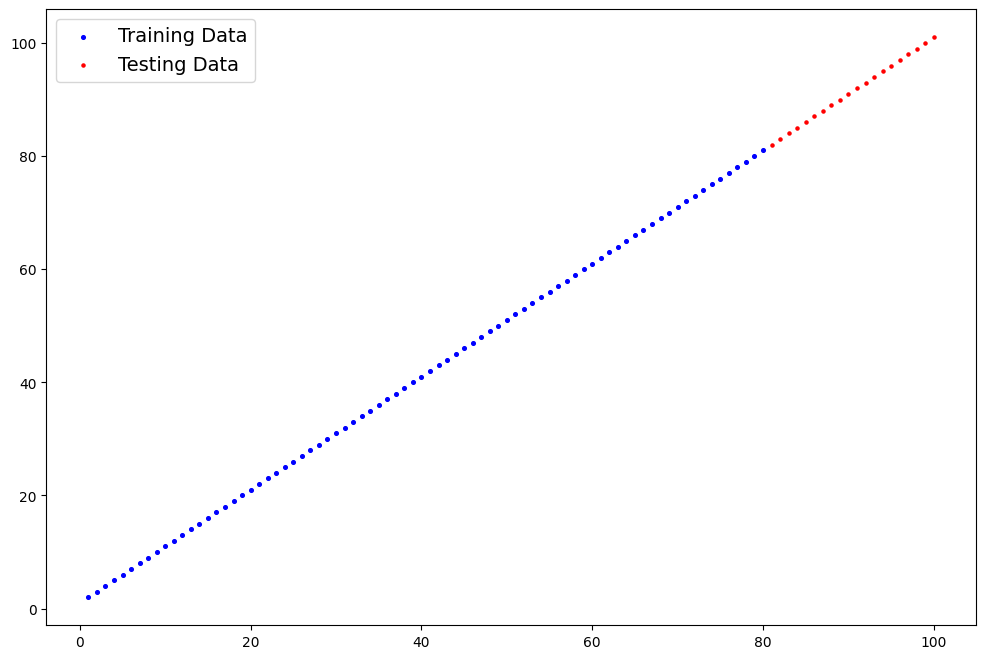

In [41]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build Model (Linear Regression)

In [42]:
from torch import nn

* LinearRegressionModel0 — simple linear regression model using PyTorch.

* The goal here is to make the model learn the line y = w*x + b
  so that it can predict outputs (y) for given inputs (x).

* Inherits from nn.Module:
  - Every PyTorch model should inherit from nn.Module.
  - This gives access to a lot of built-in features like:
      tracking parameters automatically,
      moving the model to GPU easily,
      saving/loading the model later.
  - Basically, it makes our custom class work smoothly with PyTorch’s training system.

* ____init__ __():
  - This function runs when we first create the model object.
  - super(). __ __init__ __() calls the base class constructor (nn.Module)
    so that it can internally register everything
    (this step is important for PyTorch to manage parameters properly).

  - self.weights:
      This is the slope of the line (the "w" in y = w*x + b).
      torch.randn(1) creates a random starting value — helps the model not start from zero.
      nn.Parameter(...) tells PyTorch “hey, treat this as something to learn”.
      requires_grad=True means PyTorch will calculate gradients for it during training.

  - self.bias:
      This is the intercept of the line (the "b" in y = w*x + b).
      Same process: random start + registered as a trainable parameter.
      Also has requires_grad=True so it can be updated through gradient descent.

* Why random values?
  - If both w and b started as 0, the model would not learn properly because
    the gradient (slope of the loss function) might be zero — no direction to move.
  - Random start ensures the model has something to adjust and learn from.

* forward(x):
  - This is where the actual math happens when we pass data into the model.
  - It takes input (x), multiplies by weight, adds bias → gives predicted output.
  - Formula: y_pred = (self.weights * x) + self.bias
  - Think of this as the model’s brain — this is what runs in every forward pass.

* Why define forward():
  - Every nn.Module needs it so PyTorch knows how to calculate predictions.
  - When you call model(x), PyTorch automatically runs forward(x)
    using the internal __call__() mechanism.

* What actually happens when we call model(x):
  - model.__call__(x) is triggered.
  - __call__() runs some internal setup steps (like hooks, device checks, etc.)
  - Then __call__() calls your forward(x) function.
  - The result from forward(x) is returned as model(x)’s output.
  - So model(x) is just a clean and intuitive shortcut to run forward(x).

* Why PyTorch doesn’t use model.predict(x):
  - Because model(x) is more flexible and integrates directly with the autograd system.
  - It can automatically build computation graphs, handle hooks, and work seamlessly on GPUs.
  - If you really want, you can define your own predict() that just calls forward() under torch.no_grad() — but it’s optional.

* Behind the scenes (training process):
  - You pass input x into the model → it predicts y_pred.
  - You compare y_pred to the actual y using a loss function (like MSE).
  - PyTorch tracks how the prediction was made (since requires_grad=True).
  - When you call loss.backward(), it calculates how much w and b should change.
  - Then the optimizer updates them using gradient descent.

* Why requires_grad=True:
  - It tells PyTorch to keep track of operations involving this tensor.
  - When backward() is called, gradients are calculated for these parameters.
  - Those gradients are stored in param.grad and used to update weights.
  - Without it, PyTorch won’t know to compute gradients for learning.

* Typical training loop (conceptually):
  - optimizer.zero_grad() → clear old gradients.
  - y_pred = model(x) → forward pass (creates computation graph).
  - loss = loss_fn(y_pred, y_true) → calculate loss.
  - loss.backward() → compute gradients via backpropagation.
  - optimizer.step() → update parameters using gradients.

* During inference (prediction time):
  - We don’t need gradients.
  - So we use torch.no_grad() to turn off gradient tracking:
      with torch.no_grad():
          y_preds = model(x_test)
  - This saves memory and computation because no gradient graph is built.

In [43]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    # to update values in gradient descent -> requires_grad=True
    # start with random values

  def forward(self, x: torch.Tensor) -> torch.Tensor: # for x input
    return (self.weights * x) + self.bias

In [44]:
torch.manual_seed(1)

model0 = LinearRegressionModel()

list(model0.parameters())

[Parameter containing:
 tensor([0.6614], requires_grad=True),
 Parameter containing:
 tensor([0.2669], requires_grad=True)]

In [45]:
model0

LinearRegressionModel()

In [46]:
model0.cuda

<bound method Module.cuda of LinearRegressionModel()>

In [47]:
model0.bias

Parameter containing:
tensor([0.2669], requires_grad=True)

In [48]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6614])), ('bias', tensor([0.2669]))])

* Why model(x) and not model.predict(x)?
    * PyTorch models are Python objects (classes) that inherit from nn.Module.
    * nn.Module implements __call__(...) which does bookkeeping and then calls forward(...).
    * So when you write model(x), Python invokes model.__call__(x) → that runs model.forward(x)

      What: Python-level function call gets redirected to your forward method.

      Why: this design allows PyTorch to do extra work around the forward pass (hooks, pre/post processing, modules handling, device management) automatically.

* What exactly happens when you call model(x)?
    * Step 1: model.__call__(x) runs — this method is provided by nn.Module.
    * Step 2: __call__ runs any registered forward-pre hooks (if any).
    * Step 3: __call__ calls forward(x) — your implementation of the computation.
    * Step 4: forward(x) executes tensor operations (multiplication, addition, activations, etc.).
    * Step 5: The sequence of tensor operations builds a computational graph tracked by Autograd if any tensor.requires_grad is True.
    * Step 6: __call__ runs any forward-post hooks and returns the output tensor.

      What: every tensor op remembers how it was computed so gradients can be traced back later.

      Why: Autograd needs that graph to compute derivatives during backpropagation.

* Why we rely on forward and not a separate predict by default:
    * Flexibility — forward can do anything: multiple inputs, conditionals, custom behavior.
    * Hooks & internals — __call__ integrates hooks, device transfers, and module-level behaviors before/after forward.
    * Simplicity — calling the model like a function is cleaner and more natural in Python.
      If you want a predict wrapper, you can easily add one that disables gradient tracking.

* Computational graph and gradients — kya ho raha hai under the hood:
    * Tensors with requires_grad=True record all operations that produce new tensors.
    * Each operation creates nodes in a computational graph linking parent tensors.
    * When you call loss.backward(), Autograd walks the graph backward and computes d(loss)/d(param) for each trainable parameter.
    * These derivatives are stored in param.grad and later used by the optimizer.

      Why: gradients tell the optimizer how to tweak parameters to make predictions more accurate.

* Typical training loop (step-by-step explanation):
    * 1) model = LinearRegressionModel0()  
          creates model parameters (weights & bias)
    * 2) optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  
          sets up gradient descent with a learning rate
    * 3) for each batch:

          a) optimizer.zero_grad()  
            clears old gradients (they accumulate by default)

          b) y_pred = model(x)  
            forward pass — builds the computation graph

          c) loss = loss_fn(y_pred, y_true)  
            compares prediction with ground truth

          d) loss.backward()  
            backpropagates errors — computes gradients

          e) optimizer.step()  
            updates weights and bias using gradients

          What:
              forward builds predictions & computation graph
              backward finds how each parameter affects loss
              step moves parameters in the right direction
              <br>
          Why zero_grad is needed:
              PyTorch accumulates gradients each step — clearing avoids mixing old + new ones.

* Prediction at inference time — avoid computing gradients:
    * Use torch.no_grad() because we don’t need gradients when predicting.
      Example:
          with torch.no_grad():
              y_preds = model(x_val)
              
      What: Autograd tracking is turned off — saves memory and speeds up inference.

      Why: gradients are only needed while training; computing them during prediction is wasteful.

* What requires_grad=True on parameters does:
    * Tells PyTorch to track all ops involving those tensors.
    * During forward, ops are recorded in a graph.
    * During backward, gradients are calculated and stored in .grad.
    
      Why: so optimizer knows how much to change each parameter.

In [49]:
# make predictions using model0

with torch.inference_mode():
  y_preds0 = model0(X_test)

In [50]:
y_preds0

tensor([[53.8365],
        [54.4978],
        [55.1592],
        [55.8205],
        [56.4819],
        [57.1432],
        [57.8046],
        [58.4659],
        [59.1273],
        [59.7886],
        [60.4500],
        [61.1113],
        [61.7727],
        [62.4340],
        [63.0954],
        [63.7567],
        [64.4181],
        [65.0794],
        [65.7408],
        [66.4021]])

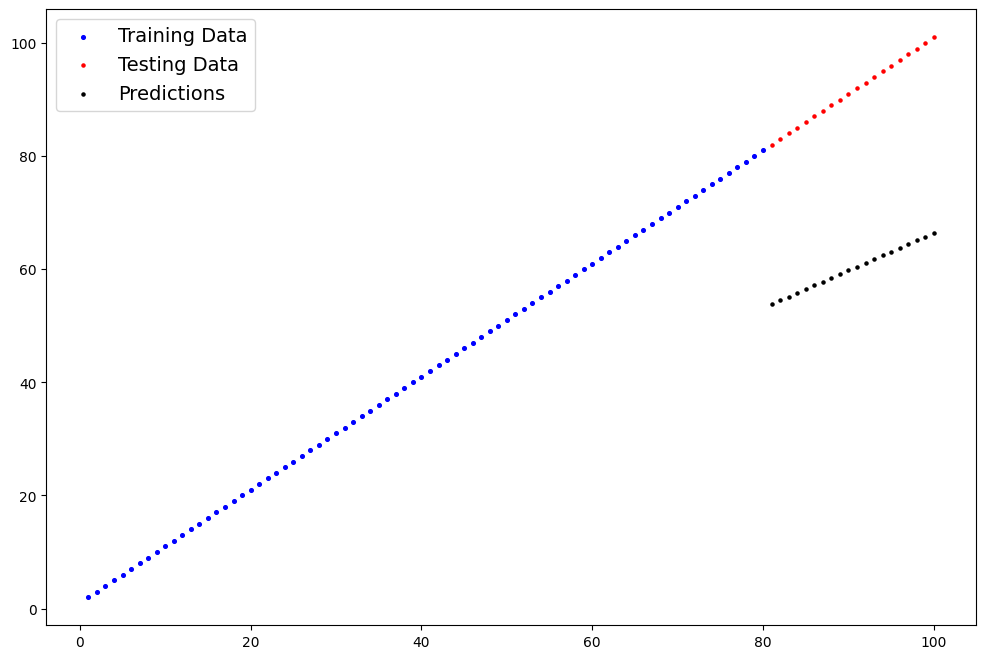

In [51]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds0)

In [52]:
y_test - y_preds0

tensor([[28.1635],
        [28.5022],
        [28.8408],
        [29.1795],
        [29.5181],
        [29.8568],
        [30.1954],
        [30.5341],
        [30.8727],
        [31.2114],
        [31.5500],
        [31.8887],
        [32.2273],
        [32.5660],
        [32.9046],
        [33.2433],
        [33.5819],
        [33.9206],
        [34.2592],
        [34.5979]])

## 3. Train Model

In [53]:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.001)

In [54]:
loss_fn

L1Loss()

In [55]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [56]:
torch.manual_seed(1)

epochs = 8

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model0.train()

  y_preds = model0(X_train)
  loss = loss_fn(y_preds, y_train.float())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():  # or torch.no_grad()
    test_preds = model0(X_test)
    test_loss = loss_fn(test_preds, y_test.float())

  epoch_count.append(epoch)
  train_loss_values.append(loss.item())  # convert to float
  test_loss_values.append(test_loss.item())

  print(f"Epoch: {epoch} \t MAE Train Loss: {loss.item():.4f} \t MAE Test Loss: {test_loss.item():.4f}")

Epoch: 0 	 MAE Train Loss: 14.4483 	 MAE Test Loss: 27.7145
Epoch: 1 	 MAE Train Loss: 12.8071 	 MAE Test Loss: 24.0482
Epoch: 2 	 MAE Train Loss: 11.1658 	 MAE Test Loss: 20.3820
Epoch: 3 	 MAE Train Loss: 9.5246 	 MAE Test Loss: 16.7157
Epoch: 4 	 MAE Train Loss: 7.8833 	 MAE Test Loss: 13.0495
Epoch: 5 	 MAE Train Loss: 6.2421 	 MAE Test Loss: 9.3832
Epoch: 6 	 MAE Train Loss: 4.6008 	 MAE Test Loss: 5.7170
Epoch: 7 	 MAE Train Loss: 2.9596 	 MAE Test Loss: 2.0507


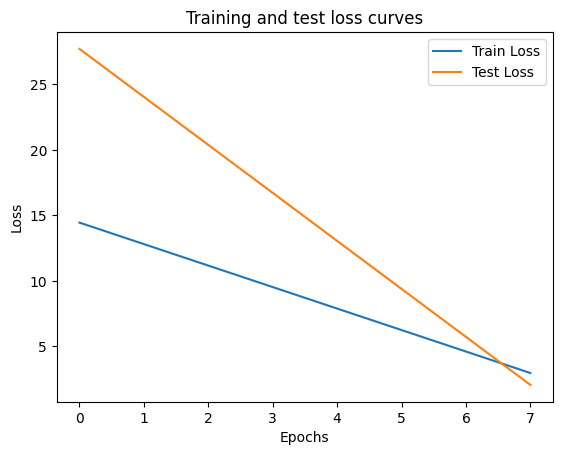

In [57]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [58]:
model0.state_dict()

OrderedDict([('weights', tensor([0.9854])), ('bias', tensor([0.2749]))])

In [59]:
weight, bias

(1, 1)

In [60]:
print("The model learned the following values for weights and bias:")
print(model0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.9854]), 'bias': tensor([0.2749])})

And the original values for weights and bias are:
weights: 1, bias: 1


## 4. Make Predictions with Model

In [61]:
model0.eval()

with torch.inference_mode():
  # Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model0(X_test)
y_preds

tensor([[80.0884],
        [81.0738],
        [82.0591],
        [83.0445],
        [84.0298],
        [85.0152],
        [86.0005],
        [86.9859],
        [87.9713],
        [88.9566],
        [89.9420],
        [90.9273],
        [91.9127],
        [92.8980],
        [93.8834],
        [94.8687],
        [95.8541],
        [96.8394],
        [97.8248],
        [98.8101]])

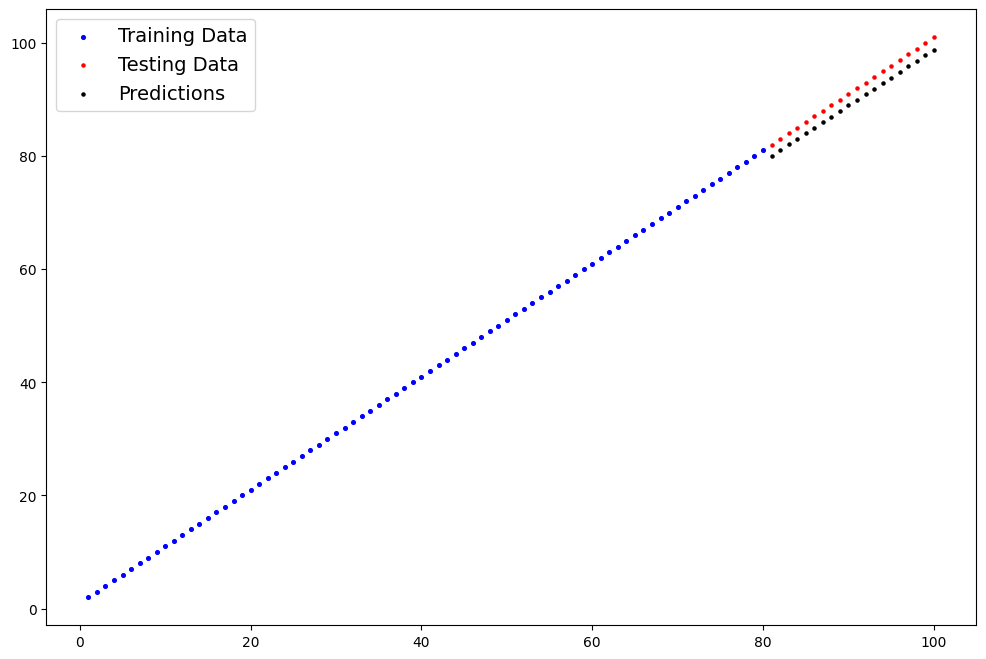

In [62]:
plot_predictions(y_preds=y_preds)

## 5. Saving the model

In [63]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_model.pth


## 6. Loading saved model

In [64]:
loaded_model0 = LinearRegressionModel()

loaded_model0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [65]:
loaded_model0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model0(X_test)

In [66]:
len(loaded_model_preds)

20

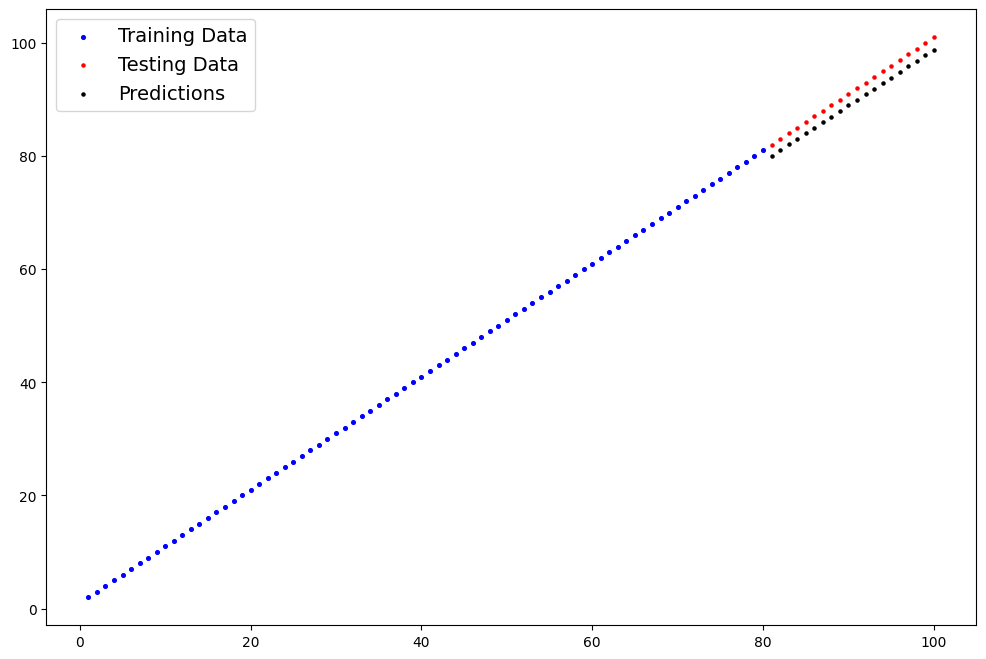

In [67]:
plot_predictions(y_preds=loaded_model_preds)

# Implementing all steps (1 - 6)

In [491]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [492]:
weight = 1.0
bias = 2.0

In [493]:
X = torch.arange(1, 301, 2).unsqueeze(1).float()  # shape (150,1)
y = (weight * X) + bias

In [494]:
X[:5]

tensor([[1.],
        [3.],
        [5.],
        [7.],
        [9.]])

In [495]:
y[:5]

tensor([[ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]])

In [496]:
len(X), len(y)

(150, 150)

In [497]:
train_split_size = int(0.8 * len(X))
train_split_size

120

In [498]:
train_split_size = int(0.8 * len(X))
X_train, X_test = X[:train_split_size], X[train_split_size:]
y_train, y_test = y[:train_split_size], y[train_split_size:]

In [499]:
len(X_train), len(X_test)

(120, 30)

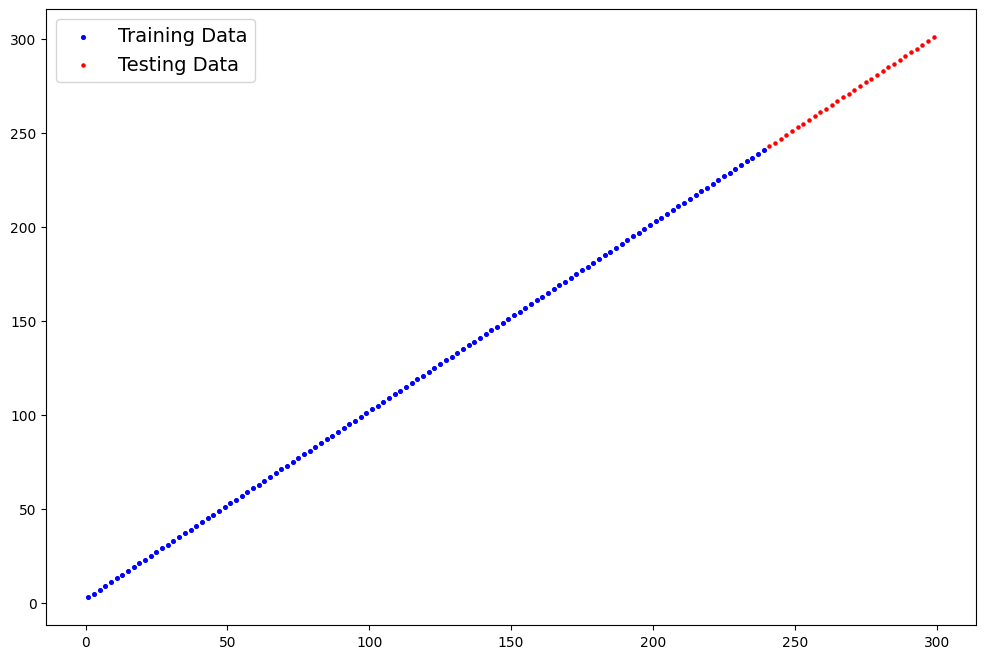

In [500]:
plot_predictions(X_train, y_train, X_test, y_test)

In [501]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear_layer(x)

In [502]:
torch.manual_seed(1)
model = LinearRegression().to(device)

In [503]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.L1Loss(reduction='mean')

In [504]:
X_train = X_train.to(device)
X_test  = X_test.to(device)
y_train = y_train.to(device)
y_test  = y_test.to(device)

In [505]:
model.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [506]:
next(model.parameters()).device

device(type='cpu')

In [507]:
torch.manual_seed(1)

epochs = 2001

X_train = X_train.to(device).float()
X_test = X_test.to(device).float()
y_train = y_train.to(device).float()
y_test = y_test.to(device).float()

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model.train()

  y_preds = model(X_train)
  loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} \t MAE Train Loss: {loss.item():.4f} \t MAE Test Loss: {test_loss.item():.4f}")

  train_loss_values.append(loss.detach())
  test_loss_values.append(test_loss.detach())
  epoch_count.append(epoch)

Epoch: 0 	 MAE Train Loss: 60.6098 	 MAE Test Loss: 133.0493
Epoch: 50 	 MAE Train Loss: 54.5599 	 MAE Test Loss: 119.4995
Epoch: 100 	 MAE Train Loss: 48.5100 	 MAE Test Loss: 105.9497
Epoch: 150 	 MAE Train Loss: 42.4600 	 MAE Test Loss: 92.3998
Epoch: 200 	 MAE Train Loss: 36.4101 	 MAE Test Loss: 78.8500
Epoch: 250 	 MAE Train Loss: 30.3602 	 MAE Test Loss: 65.3002
Epoch: 300 	 MAE Train Loss: 24.3103 	 MAE Test Loss: 51.7504
Epoch: 350 	 MAE Train Loss: 18.2603 	 MAE Test Loss: 38.2005
Epoch: 400 	 MAE Train Loss: 12.2104 	 MAE Test Loss: 24.6507
Epoch: 450 	 MAE Train Loss: 6.1605 	 MAE Test Loss: 11.1009
Epoch: 500 	 MAE Train Loss: 0.8511 	 MAE Test Loss: 1.8959
Epoch: 550 	 MAE Train Loss: 0.7969 	 MAE Test Loss: 1.1530
Epoch: 600 	 MAE Train Loss: 0.7877 	 MAE Test Loss: 1.1196
Epoch: 650 	 MAE Train Loss: 0.7779 	 MAE Test Loss: 1.1219
Epoch: 700 	 MAE Train Loss: 0.7678 	 MAE Test Loss: 1.1068
Epoch: 750 	 MAE Train Loss: 0.7573 	 MAE Test Loss: 1.0920
Epoch: 800 	 MAE Trai

In [508]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[1.0057]])),
             ('linear_layer.bias', tensor([1.0340]))])

And the original values for weights and bias are:
weights: 1.0, bias: 2.0


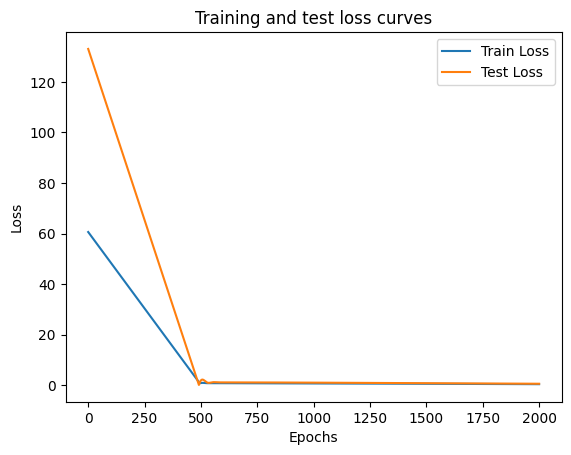

In [509]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [510]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

In [511]:
len(y_preds)

30

In [512]:
len(y_test)

30

In [513]:
def plot_preds(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_preds=None):
  plt.figure(figsize=(14, 9))
  plt.scatter(X_train.cpu(), y_train.cpu(), c="b", s=4, label="Training Data")
  plt.scatter(X_test.cpu(), y_test.cpu(), c="r", s=4, label="Testing Data")

  if y_preds is not None and torch.is_tensor(y_preds):
    plt.scatter(X_test.cpu(), y_preds.cpu(), c="#000000", s=5, label="Predicted Data for Test data")

  plt.legend()
  plt.show()

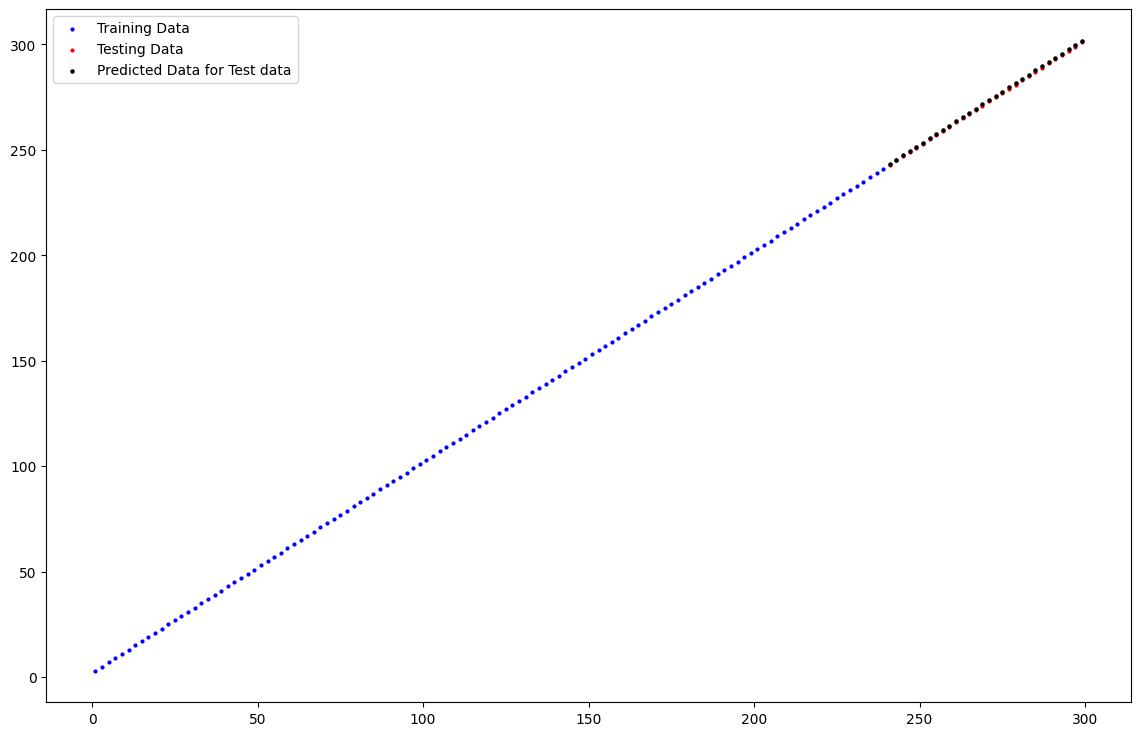

In [514]:
plot_preds(y_preds=y_preds)

In [515]:
y_preds - y_test

tensor([[0.4108],
        [0.4222],
        [0.4336],
        [0.4450],
        [0.4565],
        [0.4679],
        [0.4793],
        [0.4908],
        [0.5022],
        [0.5136],
        [0.5250],
        [0.5364],
        [0.5479],
        [0.5593],
        [0.5707],
        [0.5822],
        [0.5936],
        [0.6050],
        [0.6164],
        [0.6278],
        [0.6393],
        [0.6507],
        [0.6621],
        [0.6736],
        [0.6850],
        [0.6964],
        [0.7078],
        [0.7192],
        [0.7307],
        [0.7421]])

In [519]:
y_preds[-1]

tensor([301.7421])

In [520]:
y_test[-1]

tensor([301.])

In [522]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.0057]])),
             ('linear_layer.bias', tensor([1.0340]))])

In [523]:
X_test[-1]

tensor([299.])

In [524]:
y_for_X_last = (weight * X_test[-1]) + bias
y_for_X_last

tensor([301.])

In [525]:
y_test[-1]

tensor([301.])

In [529]:
print("Weight:", model.state_dict()['linear_layer.weight'])
print("Bias:", model.state_dict()['linear_layer.bias'])

Weight: tensor([[1.0057]])
Bias: tensor([1.0340])


In [530]:
y_pred_for_X_last = (model.state_dict()['linear_layer.weight'] * X_test[-1]) + model.state_dict()['linear_layer.bias']

In [531]:
y_pred_for_X_last

tensor([[301.7421]])

In [532]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [533]:
loaded_model1 = LinearRegression()

loaded_model1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model1.to(device)

print(f"Loaded model:\n{loaded_model1}")

Loaded model:
LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


In [534]:
loaded_model1.eval()

with torch.inference_mode():
  y_preds = loaded_model1(X_train)

In [536]:
def plot_preds_of_X_train(X_train=X_train, y_train=y_train, y_preds=None):
  plt.figure(figsize=(14, 9))
  plt.scatter(X_train.cpu(), y_train.cpu(), c="b", s=4, label="Training Data")

  if y_preds is not None and torch.is_tensor(y_preds):
    plt.scatter(X_train.cpu(), y_preds.cpu(), c="#000000", s=5, label="Predicted Data for Train data")

  plt.legend()
  plt.show()

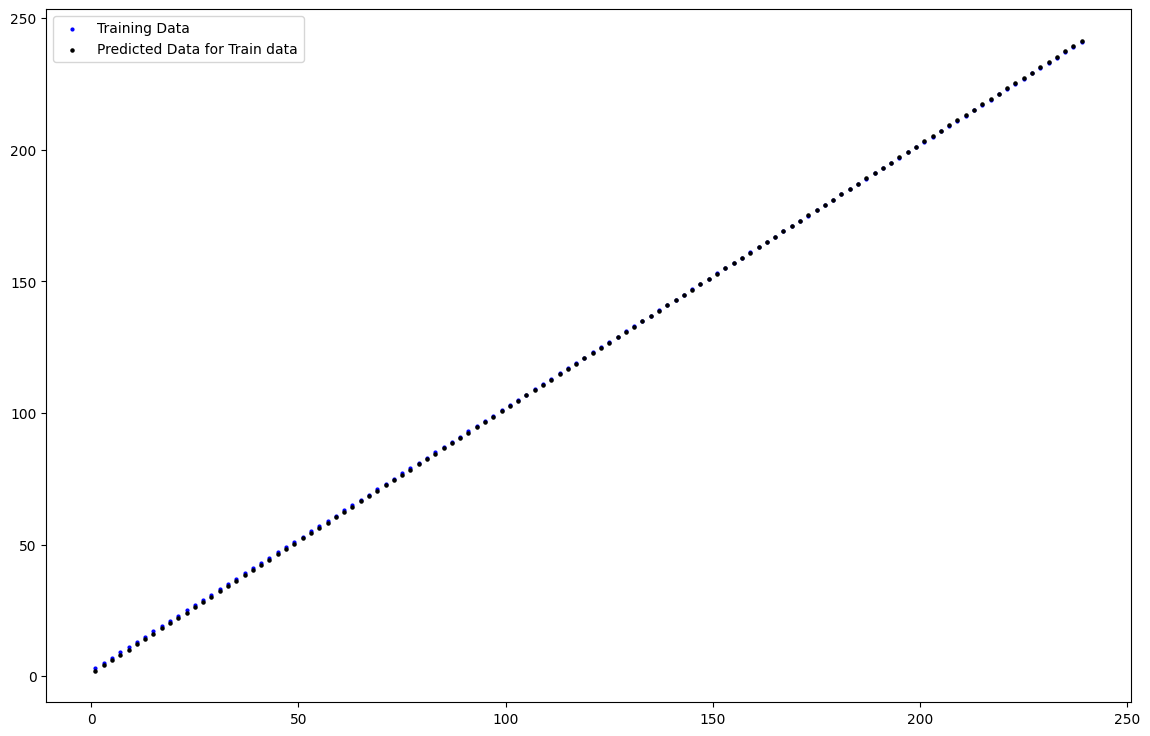

In [537]:
plot_preds_of_X_train(y_preds=y_preds)

slight error can be seen

In [538]:
!zip -r models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/01_model.pth (deflated 63%)
  adding: content/models/02_model.pth (deflated 63%)


In [539]:
from google.colab import files
files.download("models.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>